In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
Hotel_Reservation_Data = pd.read_csv("Hotel Reservations.csv")

In [45]:
Hotel_Reservation_Data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Performing Exploratory Data Analysis (EDA)

In [46]:
Hotel_Reservation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [47]:
# Check the presence of duplicate values or not
Hotel_Reservation_Data.duplicated().sum()

0

In [49]:
# Check for Missing Values
Hotel_Reservation_Data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

As we can see there are zero null values in the dataset if null value exist in the dataset simply go with below code:

In [ ]:
# imputing missing values
#def Fill_na(var):
    #if ((var.dtype=="float") or (var.dtype == "int64")):
        #var = var.fillna(var.media/mean())
    #elif ((var.dtype=="object") or (var.dtype == "O")):
        #var = var.fillna(var.mode()[0])
    #else:
       # var
   # return var 

In [8]:
Hotel_Reservation_Data = Hotel_Reservation_Data.drop(columns='Booking_ID')

In [9]:
len(Hotel_Reservation_Data.columns)

18

In [10]:
# Categorical Features present in the dataset
Categorical_Features = Hotel_Reservation_Data.select_dtypes(['object'])
Categorical_Features.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [11]:
# Numerical Features present in the dataset
Numerical_Features = Hotel_Reservation_Data.select_dtypes(['float64','int64'])
Numerical_Features.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

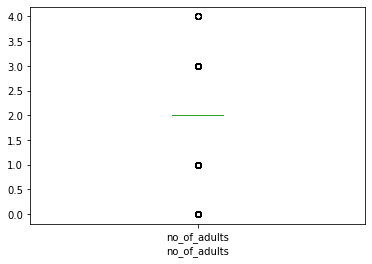

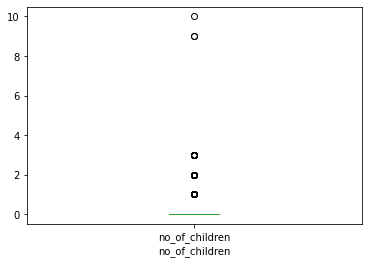

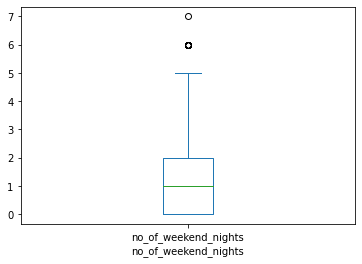

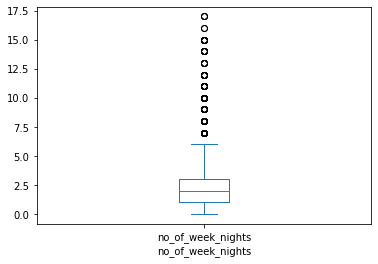

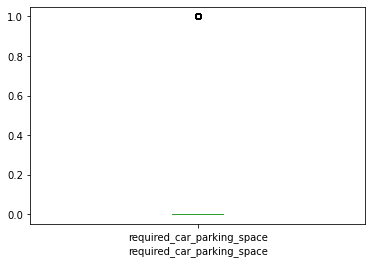

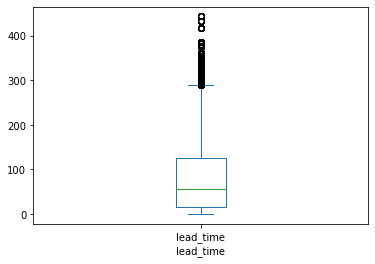

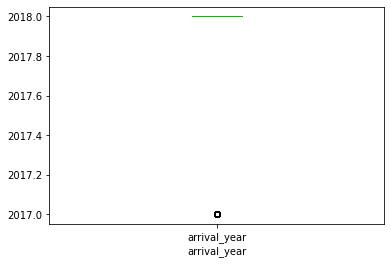

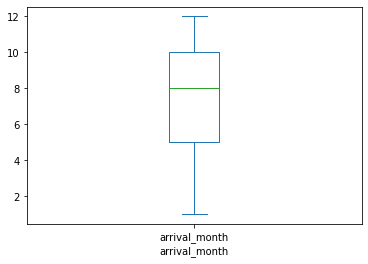

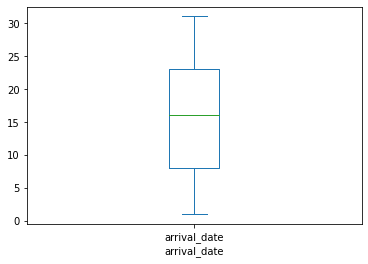

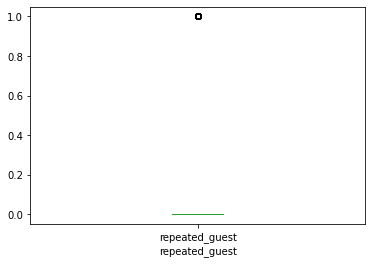

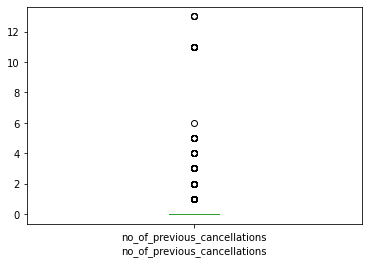

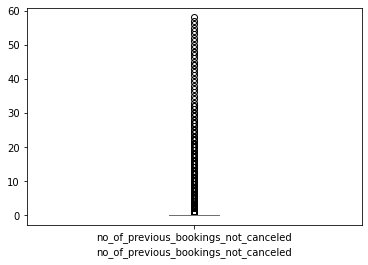

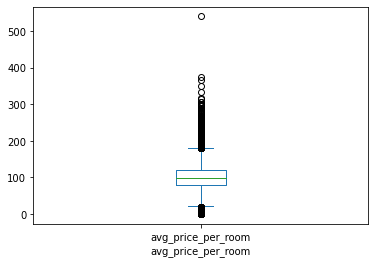

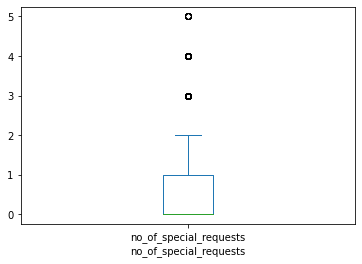

In [12]:
# box plot to detect outlier in dataset
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [13]:
#outlier treatment
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr
        x = x.clip(lower = lc, upper = uc)
    else:
        x
    return x 

In [14]:
Hotel_Reservation_Data  = Hotel_Reservation_Data.apply(outlier_var)

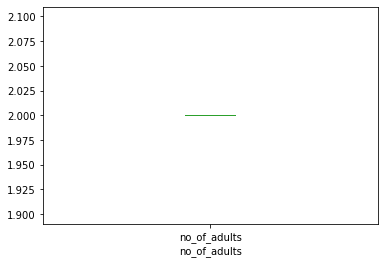

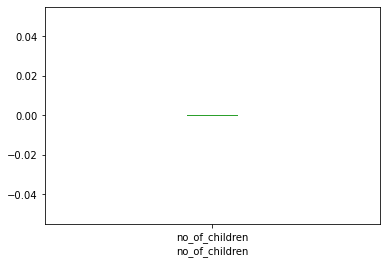

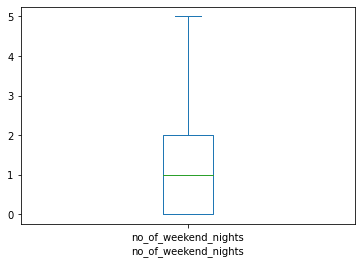

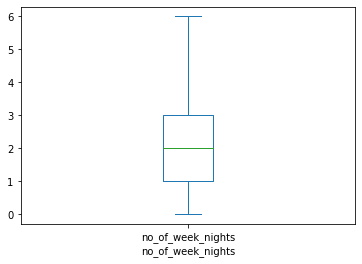

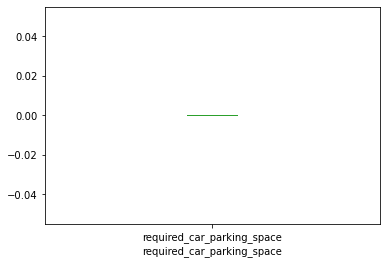

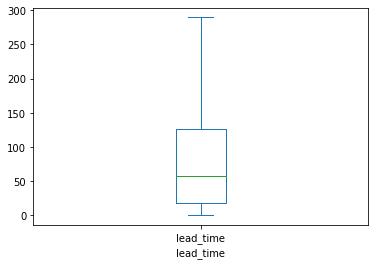

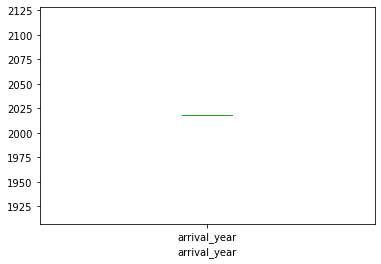

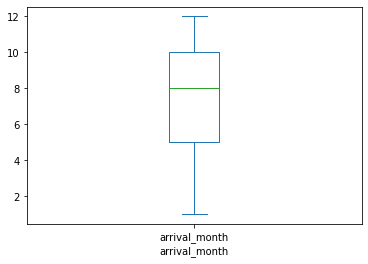

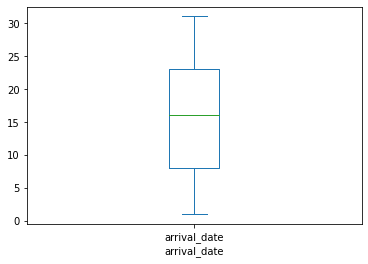

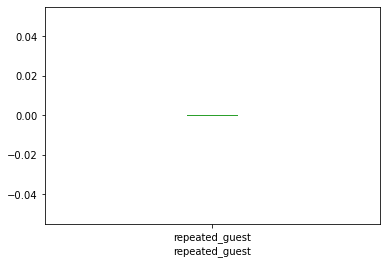

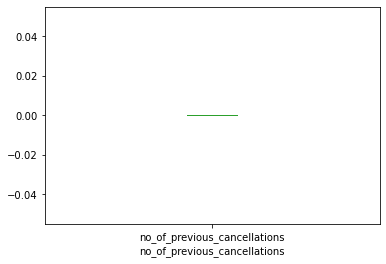

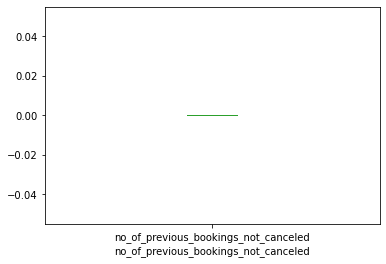

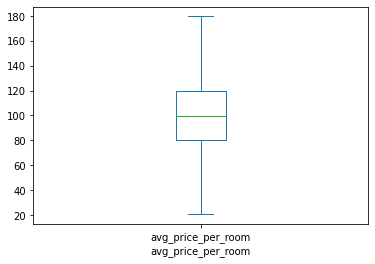

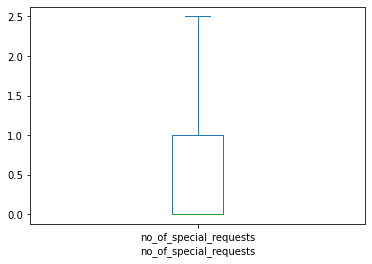

In [15]:
# box plot after treating the detected outlier in dataset
for i in Numerical_Features.columns:
    Hotel_Reservation_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

no_of_adults
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


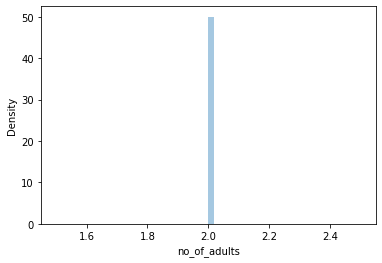

no_of_children
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


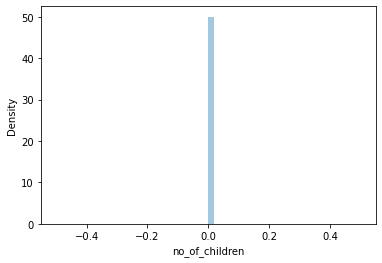

no_of_weekend_nights
0.6852788147950205


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


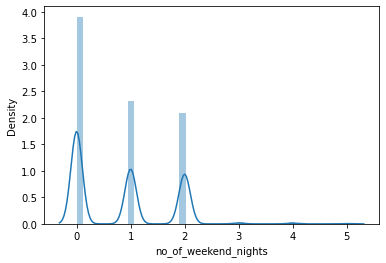

no_of_week_nights
0.604579669967297


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


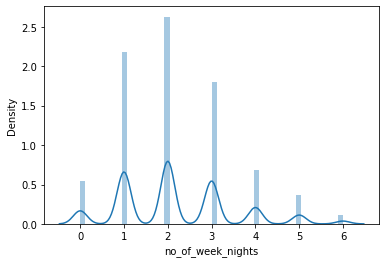

required_car_parking_space
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


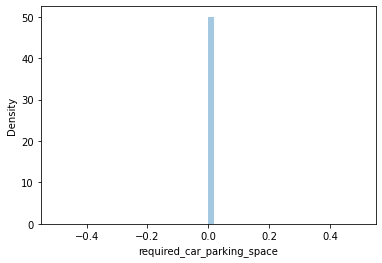

lead_time
1.0732941440527415


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


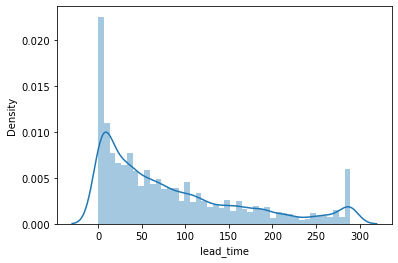

arrival_year
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


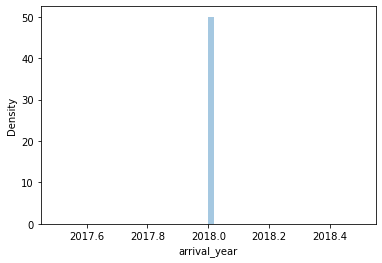

arrival_month
-0.3482144521729693


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


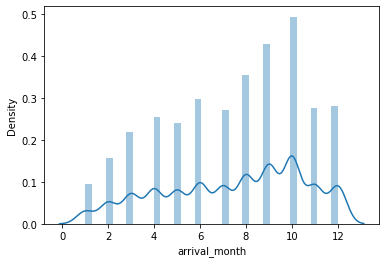

arrival_date
0.02880737786859992


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


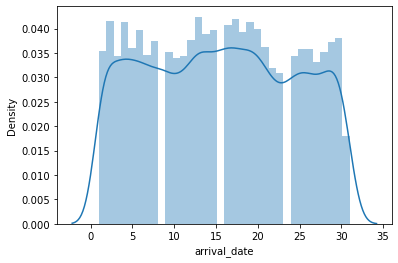

repeated_guest
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


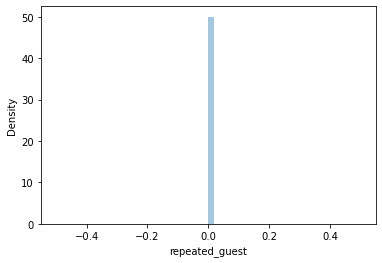

no_of_previous_cancellations
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


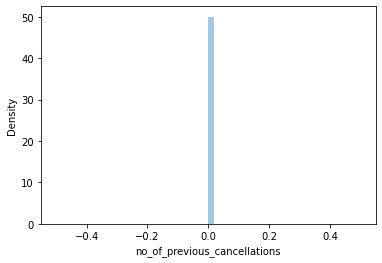

no_of_previous_bookings_not_canceled
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


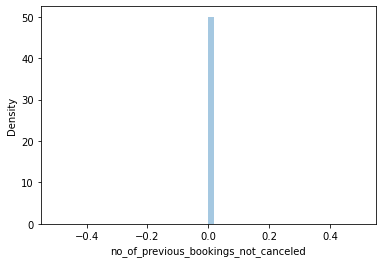

avg_price_per_room
0.3464213145463844


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


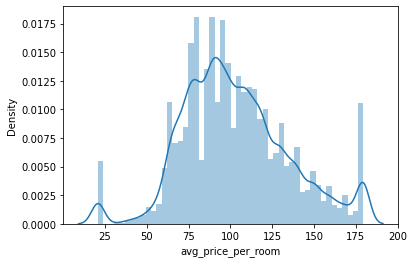

no_of_special_requests
0.876591135627164


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


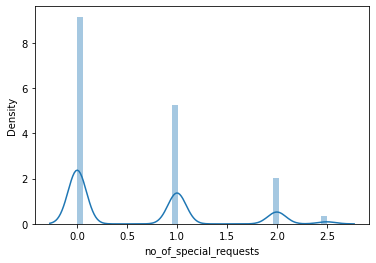

In [16]:
from scipy.stats import skew
for col in Numerical_Features.columns:
    print(col)
    print(skew(Hotel_Reservation_Data[col]))
    
    plt.figure()
    sns.distplot(Hotel_Reservation_Data[col])
    plt.show()

As we can see there are most features where skewness value lies in between 0 to 0.5, so we can say they are fairly symmetric. But there are some features for which skewness values is quite high so we can reduce the skewness of data with different transformation and if it still remains same we can use random forest for modelling purpose

In [17]:

Categorical_Features.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [18]:
Categorical_Features.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [19]:
Categorical_Features.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [20]:
Categorical_Features.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [21]:
Categorical_Features.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [22]:
# converting target variable into numerical value
Hotel_Reservation_Data['booking_status'] = np.where((Hotel_Reservation_Data['booking_status'] == 'Canceled'),1,0)


In [23]:
Hotel_Reservation_Data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,Meal Plan 1,0.0,Room_Type 1,224.0,2018.0,10,2,Offline,0.0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11,6,Online,0.0,0.0,0.0,106.68,1.0,0
2,2.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2,28,Online,0.0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5,20,Online,0.0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4,11,Online,0.0,0.0,0.0,94.50,0.0,1


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Hotel_Reservation_Data.iloc[:,0:17],
                                              Hotel_Reservation_Data.iloc[:,-1],
                                              test_size=0.3,
                                              random_state=42)

In [25]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29580,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,200.0,2018.0,8,29,Online,0.0,0.0,0.0,90.95,0.0
6325,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,79.0,2018.0,3,24,Online,0.0,0.0,0.0,90.95,1.0
33899,2.0,0.0,1.0,4.0,Meal Plan 1,0.0,Room_Type 4,78.0,2018.0,4,6,Online,0.0,0.0,0.0,99.45,1.0
720,2.0,0.0,2.0,0.0,Meal Plan 1,0.0,Room_Type 1,61.0,2018.0,10,4,Offline,0.0,0.0,0.0,91.00,0.0
22120,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,201.0,2018.0,11,1,Online,0.0,0.0,0.0,82.28,2.5


In [26]:
y_train.head()

29580    1
6325     1
33899    0
720      0
22120    0
Name: booking_status, dtype: int32

In [27]:
# converting categorical features to Numerical Features
x_train = pd.get_dummies(X_train,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_train.shape)
x_test = pd.get_dummies(X_test,columns=['type_of_meal_plan','room_type_reserved','market_segment_type']) 
print(x_test.shape)


(25392, 30)
(10883, 30)


In [60]:
# feature selection
from sklearn.feature_selection import SelectKBest,chi2
fs = SelectKBest(score_func= chi2, k=20)
fs.fit(x_train, y_train)
X_train_fs = fs.transform(x_train)
X_test_fs = fs.transform(x_test)
y_1 = x_train.columns[fs.get_support()]
z_1 = x_test.columns[fs.get_support()]
X_train_1 = pd.DataFrame(X_train_fs,columns = y_1)
X_test_1 = pd.DataFrame(X_test_fs, columns = z_1)                                  
print(X_train_1.shape, X_test_1.shape)

(25392, 20) (10883, 20)


In [61]:
TEST = np.array(X_test_1.iloc[1,:]).reshape(1,-1)
TEST.shape

(1, 20)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
Model = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
Model.fit(X_train_1, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [64]:
predicted = Model.predict(X_test_1)
predicted

array([0, 0, 0, ..., 0, 1, 1])

In [65]:
df1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predicted})
df1.head()

,Real Values,Predicted Values
4968,0,0
34540,0,0
36108,0,0
1553,1,1
24974,0,0


In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7276
           1       0.89      0.81      0.84      3607

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



In [68]:
#Training accuracy
from sklearn.metrics import accuracy_score
X_train_pred = Model.predict(X_train_1)
train_acc = accuracy_score(X_train_pred,y_train)
print("Training accuracy is {}".format(train_acc))
X_test_pred = Model.predict(X_test_1)
test_acc = accuracy_score(X_test_pred,y_test)
print("Testing accuracy is {}".format(test_acc))

Training accuracy is 0.977906427221172
Testing accuracy is 0.9012220894973813


# Testing Model on new Data

In [37]:
Model.predict(TEST)

c:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [263]:
#n_estimators = [200]
#max_features = [0.2,0.6,1]
#max_depth = [2,8,14,20,None]
#max_samples = [0.5,0.75,1.0]


In [264]:
#param_grid = { 'n_estimators':n_estimators,
               #'max_features':max_features,
               #'max_depth':max_depth,
               #'max_samples':max_samples   }
#print(param_grid)

{'n_estimators': [200], 'max_features': [0.2, 0.6, 1], 'max_depth': [2, 8, 14, 20, None], 'max_samples': [0.5, 0.75, 1.0]}


In [265]:
#Model_1 = RandomForestClassifier()

In [266]:
#from sklearn.model_selection import GridSearchCV

#model_grid = GridSearchCV( estimator = Model_1,
                           #param_grid= param_grid,
                           #cv =3,
                           #verbose=2,
                           #n_jobs=-1          )

In [267]:
#model_grid.fit(X_train_1, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 14, 20, None],
                         'max_features': [0.2, 0.6, 1],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [200]},
             verbose=2)

In [268]:
#model_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 200}

In [269]:
#model_grid.best_score_

0.8932955179076117

Pickling the model for Deployment

In [38]:
import pickle

In [40]:
pickle.dump(Model,open('classifier_model.pkl','wb'))

In [41]:
pickle_model = pickle.load(open('classifier_model.pkl','rb'))

In [42]:
pickle_model.predict(TEST)

c:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])